<img src="logo.png",width=200,height=200>

# Tercera lectura: Entendiendo las variables y sus procesos

> __Alcance de la sesión:__
>
> * Hacer uso de métodos de pandas para segmentar columnas y filas.
> * Hacer uso de los métodos `iterrows` e `iteritems` para implementar loops en pandas.
> * Implementar `enumerate` en loops.
> * Conocer las convenciones y principios rectores de la visualización de gráficos.
> * Conocer las principales convenciones en la visualización de resultados en histogramas, gráficos de punto y barras.
> * Generar simulaciones de la distribución normal y 
> * Conocer las principales aplicaciones de las distribuciones.
> * Calcular e interpretar puntajes z
> * Describir la Ley de los Grandes Números y Teorema del Límite Central y su importancia en la inferencia estadística.


* En esta semana aprenderemos sobre cómo se comportan las variables y el por qué de su comportamiento. Para ello haremos uso de gráficos para observar la forma en que se distribuyen de forma empírica, y lograr definir su comportamiento mediante las variables aleatorias.
* Haremos uso de la base de datos _Quality of Government_, base gestionada de forma periódica por la Universidad de Gotenburgo. Las unidades de medición en ésta base corresponde a 194 países, recolectando los últimos datos de Enero del 2018. Este tipo de base de datos se conoce como _transversal_, a diferencia de las bases _longitudinales_, que son las unidades de medición seguidas por un periodo finito.
* La base de datos es un compendio de alrededor de 1900 variables que miden las causas y consecuencias de un buen gobierno en materias económicas, salud pública, medio ambiente, salud institucional, corrupción, entre otras.


## Analizando el Índice de Desarrollo Humano

* En esta primera parte analizaremos el Índice de Desarrollo Humano de los países. Fue creado por el Programa de las Naciones Unidas para el Desarrollo buscando generar una medición alternativa para el desarrollo de un país, en oposición a las mediciones clásicas como el crecimiento económico.
* Este índice es un resumen de la facilidad de un país en entregarle a sus habitantes una vida larga y saludable, una educación de calidad que les permita comprender su entorno y tener un nivel de vida decente. 
* La dimensión de la salud se mide por la esperanza de vida al nacer, la educación se mide mediante el promedio de años de escolaridad en la población sobre los 25 años y la cantidad esperada de años de escolaridad en la población infantil. La dimensión del nivel de vida se mide con el producto nacional bruto per cápita. Estas dimensiones posteriormente son normalizadas y promedidadas.
* El índice va entre 0 (nivel de desarrollo humano precario) a 1 (nivel de desarrollo humano perfecto).
* Primero importemos las librerías clásicas que necesitamos para el análisis.

In [40]:
%matplotlib inline
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# archivos con funciones de visualización
import lec3_graphs as gfx

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6, 4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

* Ahora ingresamos la base de datos que se encuentra bajo el nombre `qog_std_cs_jan18.csv`.
* Mediante `shape` observamos que la tabla de datos tiene 194 filas y 1883 columnas.

In [41]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df.shape

(194, 1882)

In [42]:
df['undp_hdi'].describe().round(3)

count    186.000
mean       0.696
std        0.155
min        0.347
25%        0.567
50%        0.726
75%        0.805
max        0.948
Name: undp_hdi, dtype: float64

* Al ejecutar `describe` en la Serie se obtiene una media de .69, por lo que podemos decir que a nivel global el nivel de desarrollo está por sobre el punto de desarrollo medio (0.5), el nivel de desarrollo a nivel mundial se acerca más a ser 'bueno'. El valor mínimo registrado es de .347, substancialmente inferior a la media global, mientras que el valor máximo es de .948.  Hay que considerar que `describe` informa que hay 186 observaciones con valores registrados, que no concuerdan con las 194 observaciones originales.
* Para obtener una lista de los países que no registran niveles de desarrollo humano, podemos hacer lo siguiente:

In [43]:
# Generamos una nueva columna que devuelva un booleano si es que la observación no está presente
df['flagnull'] = df['undp_hdi'].isnull()

# dentro de cada fila de nuestra base
for i, r in df.iterrows():
    # si flagnull es verdadero
    if r['flagnull'] is True:
        # imprime el nombre
        print(r['cname'])
        
# Obs: Hay una forma menos 'memory hungry' de hacer esto con el metodo 'loc' que veremos mas adelante:
df.loc[df['undp_hdi'].isnull()]['cname'].unique()

Taiwan
Korea, North
Monaco
Nauru
Marshall Islands
San Marino
Somalia
Tuvalu


array(['Taiwan', 'Korea, North', 'Monaco', 'Nauru', 'Marshall Islands',
       'San Marino', 'Somalia', 'Tuvalu'], dtype=object)

* La mayoría de los países corresponden a protectorados o países con situación gubernamental anómala. Estos países tienden a no tener los suficientes recursos como para invertir en institutos de estadísticas gubernamentales.
* Para excluirlos los datos, `pandas` ofrece el método `dropna`. Funciona tanto en los `DataFrame` como en las `Series`. Hay que destacar que utilizar `dropna` en DataFrame requiere un poco más de cautela en el mecanismo de omisión de datos.


> __Digresión:__ Sobre `iterrows` y otros métodos
>
> * Resulta que si buscamos iterar un DataFrame con los métodos clásicos, obtendremos resultados no muy satisfactorios. Hagamos un print de los elementos contenidos en el DataFrame.
> ```python
  for i in df:
      print(i)
  ccode
  cname
  ccodealp
  ccodecow
  ...output truncado
  ```
>
> * Por defecto cuando ejecutamos un loop en un DataFrame, éste infiere que recorremos por el nombre de cada columna. Resulta que los DataFrames tienen métodos para especificar el tipo de loop a ejecutar.
> * __iteritems()__: instruye al loop iterar sobre un par de llaves (nombre de la columna) y por los valores (elementos contenidos dentro de cada columna).
>
> ```python
   demo = pd.DataFrame(np.random.randn(3, 4), columns=['col1', 'col2', 'col3', 'col4'])
   for llave, valor in demo.iteritems():
       print(llave, valor)
    col1 0   -0.302614
    1    0.582780
    2   -1.310241
    Name: col1, dtype: float64
    col2 0   -1.298668
    1   -0.664782
    2    0.858832
    Name: col2, dtype: float64
    col3 0    0.051574
    1   -0.577034
    2    0.902375
    Name: col3, dtype: float64
    col4 0    1.393319
    1   -0.150681
    2   -1.635101
    Name: col4, dtype: float64
  ```
> * __iterrows()__: instruye al loop iterar por el índice (posición de la fila en el DataFrame) en conjunto a los valores (elementos contenidos dentro de cada fila).
>
> ```python
    for indice, valor in demo.iterrows():
        print(indice, valor)
    0 col1   -0.302614
    col2   -1.298668
    col3    0.051574
    col4    1.393319
    Name: 0, dtype: float64
    1 col1    0.582780
    col2   -0.664782
    col3   -0.577034
    col4   -0.150681
    Name: 1, dtype: float64
    2 col1   -1.310241
    col2    0.858832
    col3    0.902375
    col4   -1.635101
    Name: 2, dtype: float64
  ```
>

### Histograma: Visualizando el comportamiento de una variable

* Cuando buscamos visualizar cómo se comporta una variable contínua, una de las formas exploratorios más comunes es mediante un __histograma__, que es una representación de la _distribución empírica_ de la variable.
* Para ello haremos uso de `matplotlib`, una librería orientada a "_hacer fácil las cosas fáciles y posibles las cosas imposibles_" mediante una sintáxis clara y concisa respecto a la forma en que se pasan argumentos y se pueden modificar gráficos. Está bien integrado con `pandas` y `numpy`, facilitando la interacción entre estos elementos.
* Para generar un histograma, los valores contínuos se agrupan en _casillas_ (bins) y posteriormente se cuentan la cantidad de observaciones dentro de cada casilla. El comportamiento de matplotlib por defecto es calcular de forma automática las casillas.
* Si observamos el histograma _índice de desarrollo humano_, en el eje X encontramos el _rango de valores_ de la variable, y en el eje Y encontramos la _frecuencia_ (la cantidad de repeticiones).
* Existe una gran cantidad de casos con un índice de desarrollo humano igual o superior a .70, pero también encontramos otro grupo de observaciones con valores cercanos a .50. Este gráfico revela algo que ya sabíamos: existe el mundo desarrollado y el mundo subdesarrollado.

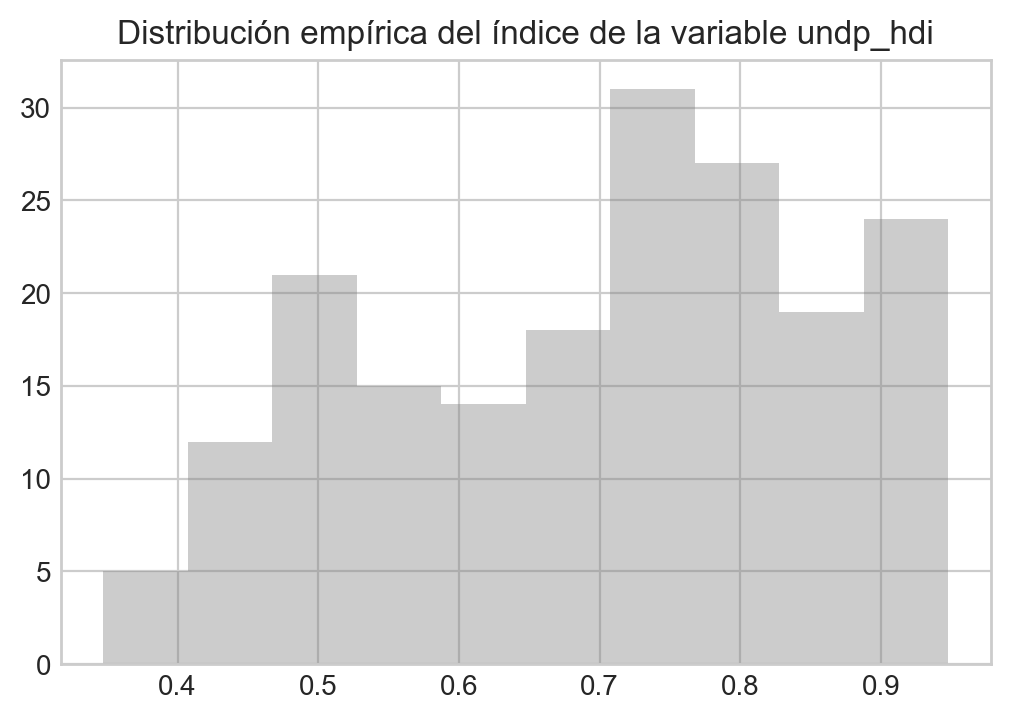

In [44]:
# vamos a eliminar los datos perdidos en la columna undp_hdi con dropna()
hdi_dropna = df['undp_hdi'].dropna();
plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.title("Distribución empírica del índice de la variable undp_hdi");

* Ya caracterizando la media del índice de desarrollo humano, estamos interesados en ver los niveles de desarrollo en distintas regiones. Para ello necesitamos calcular las medias a nivel de grupo y posteriormente graficarlas.
* Nuestro primer punto es separar las columnas a procesar en un nuevo objeto. Ésto lo logramos mediante al método `loc` que tiene un `DataFrame`.
* Para consultar por filas y columnas específica específicas, DataFrame dispone de los métodos `loc` (para especificar etiquetas de los ejes) e `iloc` (para especificar los números integrales asociados a los ejes).


> __Digresión:__ Sobre `loc` e `iloc`
>
> * La forma canónica para `loc` e `iloc` es la siguiente:
> ```python
  <pandas.DataFrame>.(loc|iloc)[<filas>, <columnas>]
  ```
>
 * Para las consultas con dos o más en una de las posiciones, se pueden pasar listas como argumentos:
>
> ```python
  <pandas.DataFrame>.(loc|iloc)[['elementos','de','fila'],
                              ['elementos','de','columna']]
  ```
>
> * Para este caso, nuestro segmentador especifica que preservaremos todas las filas (mediante el operador `:`). Posteriormente pasamos una lista con el nombre de todas las columnas a segmentar.

In [45]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region'] ]
hdi_group.shape

(194, 4)

* Nuestro nuevo objeto posee 194 observaciones y 4 columnas. 
* Resulta que nuestra variable indicadora sobre la región de cada país necesita renombrar cada dígito. Sabiendo que el libro de códigos nos entrega las etiquetas, podemos recodificarlas con `replace`

In [46]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                           ['EastEurope', 'LatAm', 'NorthAfrica',
                                                            'SubSaharian', 'WesternDem', 'EastAsia',
                                                            'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])

In [47]:
print("La media del índice de desarrollo humano para nuestra muestra es de : ",round(hdi_group['undp_hdi'].mean(),2))

La media del índice de desarrollo humano para nuestra muestra es de :  0.7


* Sabiendo que si nuestro índice de desarrollo humano va de 0 a 1, donde menores valores implican un nivel más precario de desarrollo humano, la media se posiciona cercana al .70. Esto sugiere que a nivel global no deberíamos estar tan mal.
* Ahora, el contrapunto es que la media no es ponderada y asume iguales pesos de las observaciones.
* Lo que necesitamos es calcular puntajes a nivel regional, lo que se logra mediante `groupby`. Eesta función mapea todos los valores únicos de una columna en grupos (en este caso, las 10 posibles regiones existentes), y permite pasar funciones a éstos grupos.
* Para este caso, posterior a la declaración de nuestra variable aglutinadora `'region_recod'`, vamos a solicitar las medias agrupadas  del nivel de desarrollo humano.

In [48]:
group_mean = round(hdi_group.groupby('region_recod')['undp_hdi'].mean(),2)
group_mean

region_recod
Caribbean        0.74
EastAsia         0.82
EastEurope       0.78
LatAm            0.72
NorthAfrica      0.75
Pacific          0.64
SouthAsia        0.61
SouthEastAsia    0.70
SubSaharian      0.51
WesternDem       0.90
Name: undp_hdi, dtype: float64

* Al llamar el objeto creado, el resultado es una serie con floats que entrega el porcentaje regional.
* Si presentamos esta información de ésta manera, probablemente pasaremos más tiempo buscando diferenciar cada región entre sí. Preferimos presentar estos datos mediante un __dotplot__.
* En nuestra primera línea realizaremos un gráfico de puntos, donde el eje x serán los valores del objeto, e y será las llaves (o etiquetas) asociadas a nuestros valores.

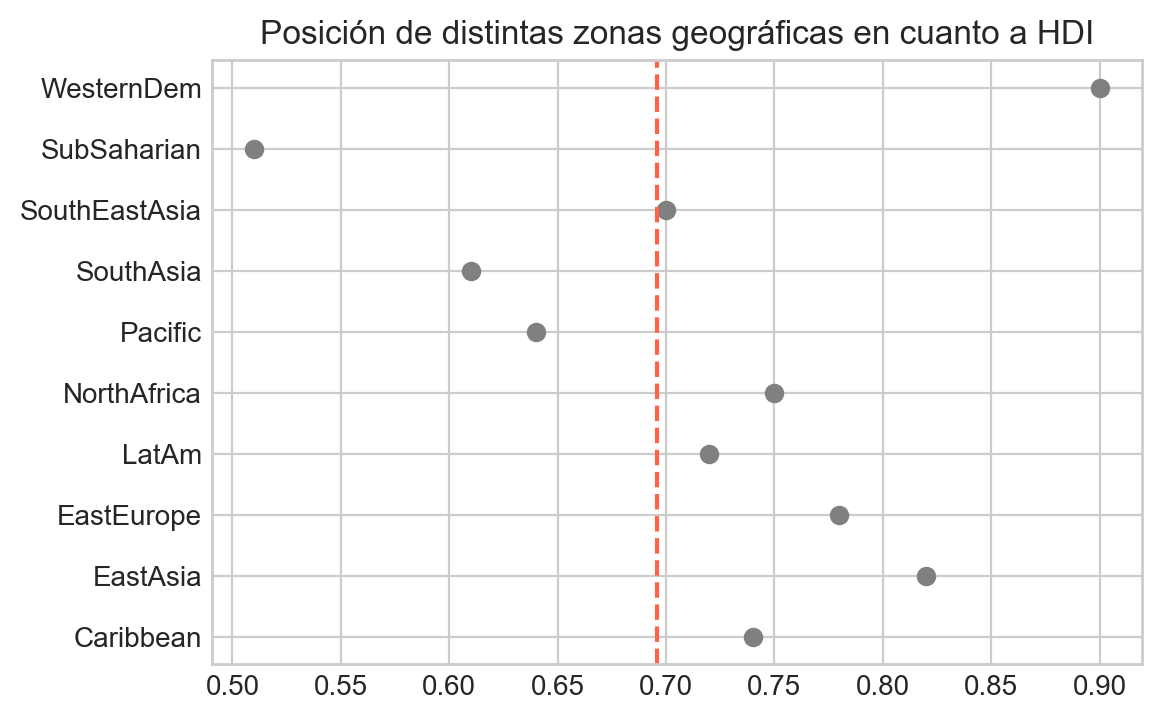

In [49]:
plt.title('Posición de distintas zonas geográficas en cuanto a HDI')
plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle = '--');

* Nuestro gráfico aclara el hecho que en promedio las democracias avanzadas (Europa Occidental y Estados Unidos, Canadá y Australia) alcanza niveles de desarrollo humano sobre el .90. A diferencia, las regiones donde la vida es más precara e inestable es el África Subsahariana y las Islas del Pacífico. 

* Para clarificar aún más este punto, agreguemos la media de la variable a nuestro histograma. Para ello utilizaremos el método `axvline` de `matplotlib`, que inserta una línea vertical.
* También agregaremos una línea vertical que señale la mitad de la __escala__ de la variable, no su mediana. Así observaremos cuántos países alcanzan una situación deficiente.

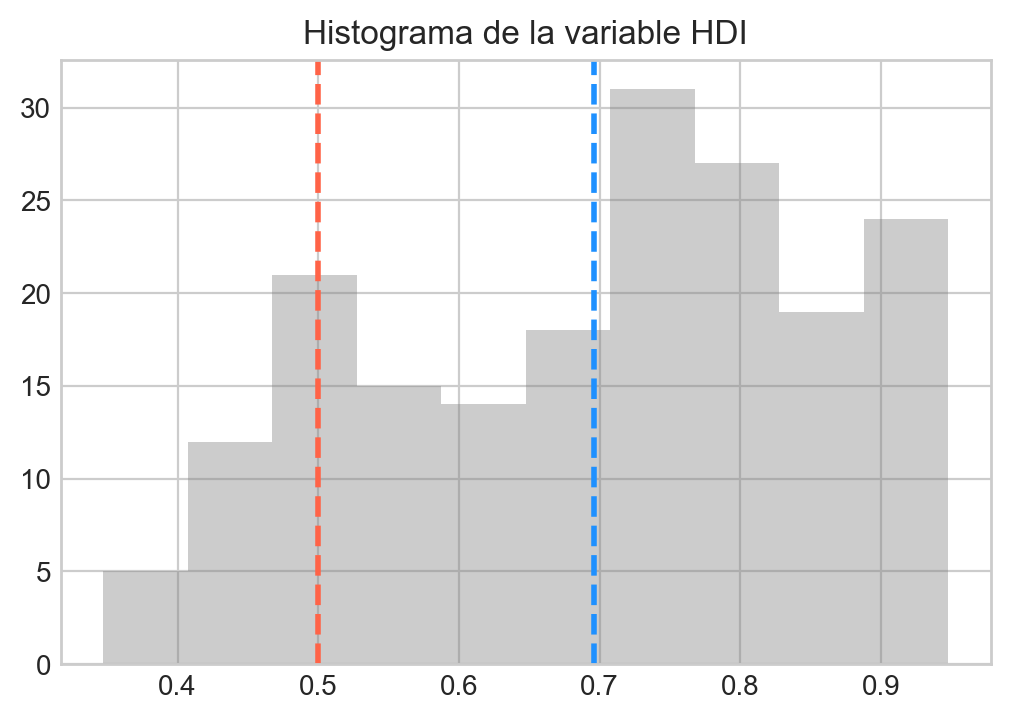

In [50]:
#guardemos la media en un objeto
hdi_mean = hdi_dropna.mean()

plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.axvline(hdi_mean, color='dodgerblue', linestyle='--', lw=2)
plt.axvline(0.5, color='tomato', linestyle='--', lw=2)
plt.title('Histograma de la variable HDI');

* Nuestro argumento se mantiene sólido. En base a la evidencia generada, existen dos grandes grupos de países: Los desarrollados y los no desarrollados.
* Cabe destacar que entre .50 y .70 encontramos a los países _en vías de desarrollo_.

## La distribución normal: Caracterizando nuestras variables

* Resulta que el índice de desarrollo humano (y toda medición empírica), tiende a responder a ciertas leyes respecto a su comportamiento. Estos es resumen en _variables aleatorias_, que definien los posibles valores asociados a una distribución probabilística.
* Para nuestro ejemplo, el índice de desarrollo humano tiene una distribución aproximadamente normal.

### ¿Y cómo comprobamos la normalidad de una variable?

* Podemos inspeccionar qué tanto se acopla el histograma a la distribución normal al incluir la media y varianza de `hdi_dropna`. 
* La distribución normal (o Gaussiana) es una de las distribuciones más utilizadas para modelar eventos contínuos. Fenómenos como la altura y peso de una población, así como los puntajes PSU o las notas de una clase se comportan de manera _aproximadamente normal_. Para el caso de una sola variable , depende de dos parámetros: la media (representada como $\mu$) y varianza (representada como $\sigma^{2}$).
* El parámetro media gobierna el punto donde se concentra la mayoría de los datos. Ésta sigue la definición de las medidas de tendencia central.
* El parámetro varianza representa qué tan concentrados están los datos __entorno a la media__.

In [51]:
print("La media es: ", round(hdi_dropna.mean(), 3))
print("La varianza es: ", round(np.var(hdi_dropna), 3))

La media es:  0.696
La varianza es:  0.024


* Si la media es de .696 y la varianza es de 0.02, podemos analizar si la distribución empírica del índice de desarrollo humano sigue la distribución normal $X_{i}\sim\mathcal{N}(0.696, 0.024^{2})$.
* Para sobreponer la curva gaussiana a nuestro histograma, utilizamos las siguientes líneas de código.

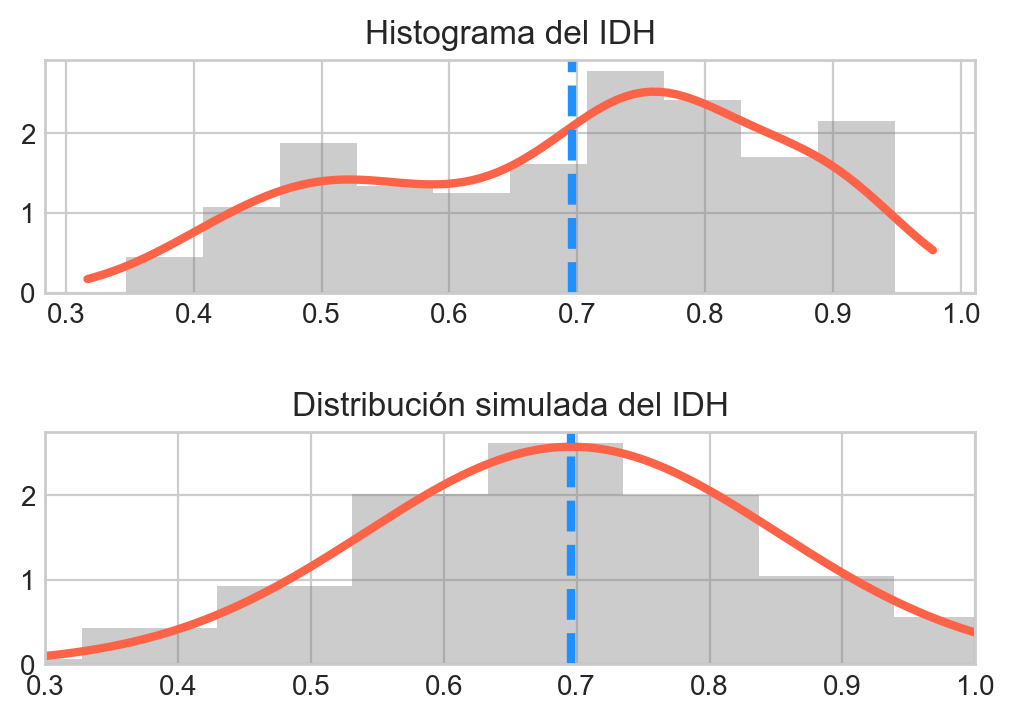

In [52]:
# Con plt.subplot vamos a dividir el espacio del en dos partes
plt.subplot(2,1,1)

# Graficamos el mismo histograma, especificando Normed para que el histograma represente densidades y no frecuencias 
plt.hist(hdi_dropna, color='grey', alpha=.4, normed=True)

# extraemos los límites del histograma
x_min, x_max = plt.xlim()

# utilizandos los límites del histograma para crear un array
x_axis = np.linspace(x_min, x_max, 100)

# graficamos la curva de densidad empirica (permite comparar directamente con la curva de densidad teorica)
gauss_kde = stats.gaussian_kde(hdi_dropna) # Kernel gaussiano
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color='tomato', lw=3)

# agregamos la línea vertical para identificar la media
plt.axvline(hdi_dropna.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma del IDH")

# El segundo gráfico
plt.subplot(2, 1, 2)

# Simulamos cómo debería comportarse un histograma normal.
plt.hist(np.random.normal(0.696, np.sqrt(0.024), 1000), color='grey', alpha=.4, normed=True)

# Fijamos los límites del eje x 
plt.xlim(0.3, 1)

# Generamos una lista entre
x_axis = np.linspace(.3, 1, 1000)
plt.plot(x_axis, stats.norm.pdf(x_axis,
                                0.696, np.sqrt(0.024)),
         color='tomato', lw=3)
plt.axvline(0.696, color='dodgerblue', linestyle='--', lw=3)
plt.title("Distribución simulada del IDH")
plt.subplots_adjust(hspace=0.6)


* La figura de arriba presenta el histograma del índice de desarrollo humano, y la figura de abajo representa la simulación de una variable distribuída normal con la media y varianza de la variable. La recta azul indica la media de .696, y la curva roja representa la distribución normal.
* Mientras que en el gráfico de arriba los puntajes no se acoplan de forma exacta a la curva y la media, la figura de la distribución simulada presenta el comportamiento _esperado_.
* Cabe destacar que el comportamiento descrito en el histograma de la variable no destacarta la utilización de la distribución normal como una ley para resumir el comportamiento.

### ¿Qué podemos esperar de los parámetros de una distribución normal?

* Ya teniendo una primera aproximación a la distribución normal, generemos varias situaciones para comparar su comportamiento. En la figura creada con `gfx.normal_distributions()` se presenta tres casos donde tanto media como varianza cambian de valor:
    - La distribución normal estandarizada, que representa el caso donde la media es 0 y la varianza es de 1. Se utiliza como benchmark para realizar comparaciones.
    - Una distribución donde la media es de 0 y su varianza es de .5.
    - Una distribución donde la media es de -1 y su varianza es 1.
* Consideremos el caso de comparación. Dado que la media es 0, la cúspide de la distribución se concentrará entorno a este valor. Comparado a la curva con menor varianza que si bien presenta la cúspide en 0, tiene a presentar una mayor densidad dado que la menor varianza conlleva a concentrar una mayor cantidad de información alrededor de la media. Si bien la curva verde presenta forma idéntica a la normal estandarizada, su cúspide se centra en -1 a diferencia de la normal estandarizada.
* En el lado derecho se visualizan las densidades acumuladas de las simulaciones. La función acumulada expresa el porcentaje de datos _hasta_ cierto punto del rango. Observamos que cuando x=0, la función acumulada de la distribución normal estandarizada es cercana al 50%, mientras que para la distribución con menor media es cercana al 90%. De similar manera, el 50% de la información en la simulación con una menor media se alcanza en -1.

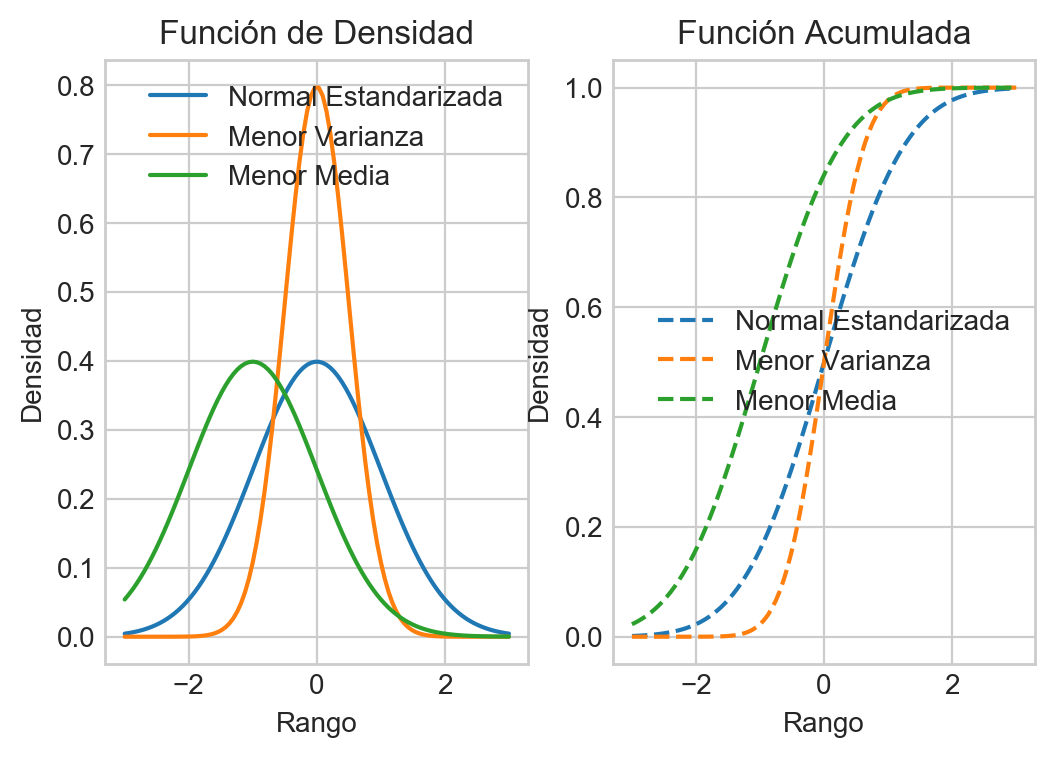

In [53]:
gfx.normal_distributions()

### Una variable no-normal y una posible transformación


* Ahora generemos el histograma del producto interno bruto per cápita de los países. Para graficarlo, procedemos de manera similar a como lo hicimos con el índice de desarrollo humano. 
* Primero excluyamos todas las observaciones perdidas y guardemosla en una variable nueva.
* La posible transformación candidata es el logaritmo. Mediante éste se 

In [54]:
# generemos la normalización del gdp mediante el logaritmo.
gdp_dropna = df['gle_cgdpc'].dropna()
log_gdp = np.log(gdp_dropna)
print(round(log_gdp.mean() ,2))

8.85


* Posteriormente grafiquemos el histograma y su curva.

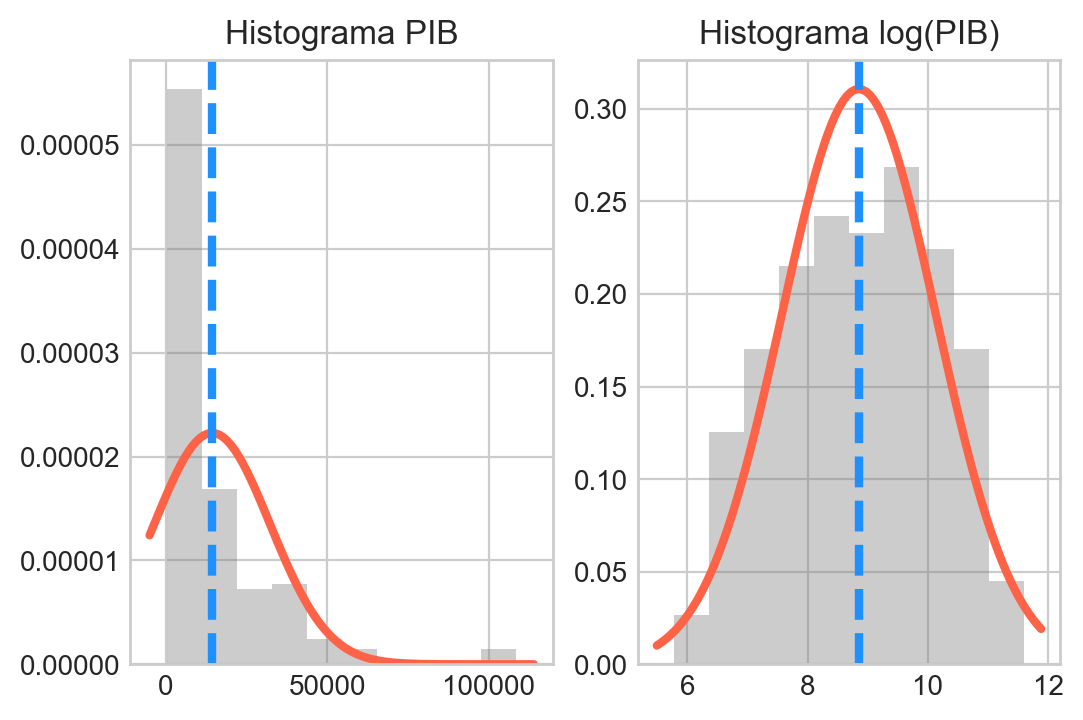

In [55]:
plt.subplot(1, 2, 1)
plt.hist(gdp_dropna, color='grey', alpha=.4, normed=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis,
                                gdp_dropna.mean(),
                                gdp_dropna.std()),
         color='tomato', lw=3)
plt.axvline(gdp_dropna.mean(),
            color='dodgerblue',
            linestyle='--', lw=3)
plt.title("Histograma PIB")

plt.subplot(1, 2, 2)
plt.hist(log_gdp, color='grey', alpha=.4, normed=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis,
                                log_gdp.mean(),
                                log_gdp.std()),
         color='tomato', lw=3)
plt.axvline(log_gdp.mean(),
            color='dodgerblue',
            linestyle='--', lw=3)
plt.title("Histograma log(PIB)");

* En el gráfico de la izquierda se presenta el histograma del PIB sin transformar, observamos que la distribución presenta un fuerte sesgo en valores bajos. Hay pocos países que tienen ingresos promedio de 100000 dolares o más que escapan de la media, mientras que hay una amplia mayoría de observaciones con ingresos bajo la media. Esta distribución altamente sesgada donde algunos valores se escapan de forma substancial de la muestra se puede corregir mediante la distribución _lognormal_.
* Podemos aplicar un logaritmo al vector `gdp` para reescalar sus valores. En la figura de la derecha se presenta el histograma del logaritmo del PIB, 
* El principal contrapunto de ocupar logaritmos para transformar variables, es el hecho que sus resultados son difíciles de implementar. Por lo general sirven para desarrollar modelos de regresión donde la perturbación de los errores.
* Efectivamente al reescalar la variable, los nuevos puntajes generan un histograma aproximadamente normal.

### Una variante importante: La distribución normal estandarizada

* Cuando la distribución normal tiene una media de 0 y una varianza de 1, se conoce como la distribución normal estandarizada. Dado que su media representa cero, permite reflejar diversos eventos tales como la ausencia de efecto de un estimador (distribución conocida como _distribución bajo la hipótesis nula_), o también cuando buscamos centrar observaciones de una variable respecto a la media (procedimiento conocido como puntajes z).
* Los ejemplos anteriores sugieren la omnipresencia de la distribución normal. Dado su afabilidad para ser interpretada, cabe resaltar sus características más importantes:
    1. Es __unimodal__, lo que implica que tiene sólo un punto que es el más alto, donde se concentran la mayoría de los datos.
    - Es __simétrica__ dado que la mayoría de los datos gravitan alrededor de la media.
    - Es __positiva__, por tanto todos los valores (positivos o negativos) tienen una probabilidad $\text{Pr}\geq 0$ de suceder.
    
* Mediante los componentes paramétricos de la distribución normal podemos calcular el porcentaje de datos que estará bajo la curva. Esto se visualiza abajo con `gfx.normal_distribution_sigma()`:
    1. El 68% de los datos se encontrarán entre $\pm 1 \sigma \leadsto \text{Pr}(\mu - \sigma \leq X \leq \mu + \sigma)$. Esto corresponde al área de azul intenso.
    - El 95% de los datos se encontrarán entre $\pm 2 \sigma \leadsto \text{Pr}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma)$.
    - El 99% de los datos se encontrarán entre $\pm 3 \sigma \leadsto \text{Pr}(\mu - 3 \sigma \leq X \leq \mu + 3 \sigma)$. Esto corresponde a las colas de la distribución normal, con un azul pálido.

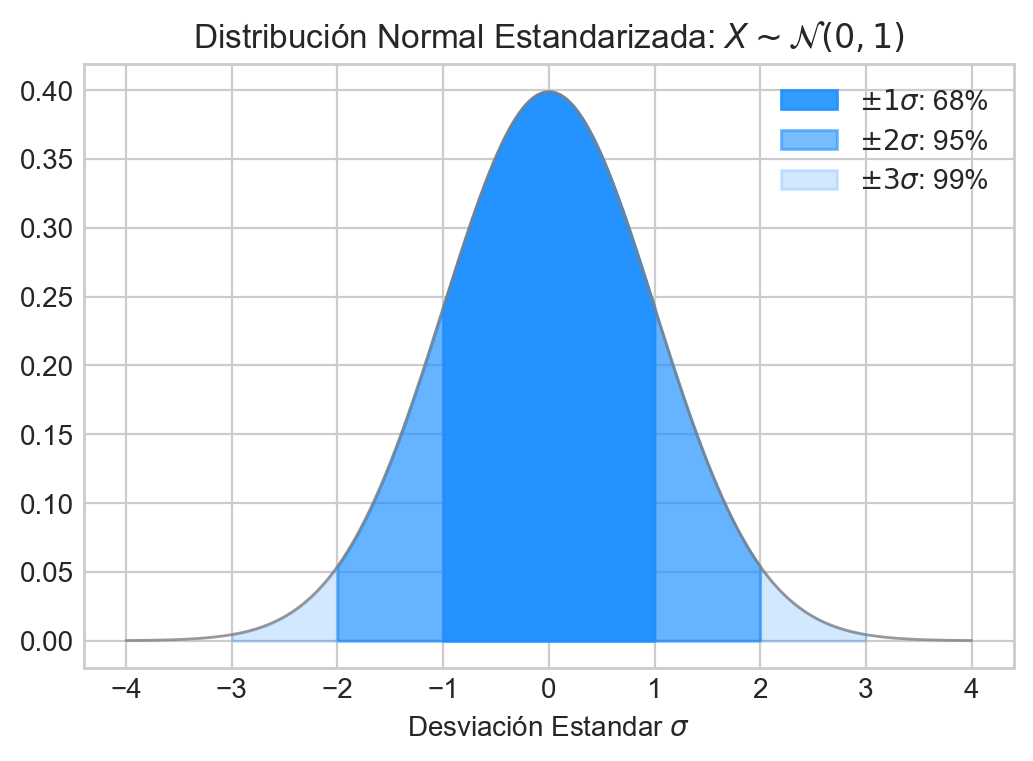

In [56]:
gfx.normal_distribution_sigma()

## Puntajes Z

* La información entregada por la distribución normal nos permite aproximar nuestro conocimiento respecto al comportamiento de la variable. 
* También podemos utilizar ésta información para analizar cómo una observación en específico se comporta respecto a la media. Para ello utilizamos los _puntajes z_.
* La fórmula se detalla a continuación.

$$
\text{Puntaje Z} = \frac{x_{i} - \bar{x}}{\sigma}
$$

* El procedimiento para obtener el puntaje z de una observación implica:
    1. Obtener la media del vector donde proviene la observación.
    - Restar la observación con la media.
    - Dividir el resultado por la desviación estandar.
    
* El resultado de la operación indica _a cuántas desviaciones estándares se encuentra una observación respecto a la media_.
* ¿Cuál es el índice de desarrollo humano de Chile? Para ello debemos acceder a la celda específica.
* Partamos por separar la fila de Chile. Esto lo logramos mediante:

In [57]:
chile = df[df['cname'] == 'Chile']

* Instruímos al `DataFrame` para seleccionar sólo la fila que satisfaga la condición `df['cname'] == 'Chile']`. Posteriormente podemos acceder a la columna específica:

In [58]:
chile['undp_hdi']

35    0.845
Name: undp_hdi, dtype: float64

* Resulta más conveniente concatenar todas estas acciones de manera tal de escribir código más sucinto (a expensas de hacerlo un poco más inentendible).

In [59]:
hdi_chile = df[df['cname']=='Chile']['undp_hdi']
print('hdi Chile: %.3f' %hdi_chile)
print('hdi medio a nivel mundial: %.3f' %round(hdi_dropna.mean(),3))

hdi Chile: 0.845
hdi medio a nivel mundial: 0.696


* Una forma rudimentaria de calcular el puntaje-z de Chile es la siguiente, donde aplicamos los componentes detallados en la fórmula.
* Con un valor final de 0.96, observamos que Chile se posiciona casi una desviación estandar respecto al promedio mundial del índice de desarrollo humano.

In [60]:
print('Puntaje Z para Chile: %.2f' %((hdi_chile - hdi_dropna.mean()) / np.sqrt(hdi_dropna.var())))

Puntaje Z para Chile: 0.96


* Ya sabemos desarrollar funciones, y podemos generalizar todo este procedimiento para calcular el puntaje z de cualquier país respecto a cualquier variable. 
* Para este ejemplo, vamos a seguir analizando el índice de desarrollo humano.

In [61]:
def get_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())
    return (get_point - get_mean) / get_std

* Como ya sabemos, la prueba de fuego de una función es que replique el mismo resultado que la versión rudimentaria. Observamos que nuestra función `get_zscore` devuelve el mismo resultado.

In [62]:
get_zscore('undp_hdi', 'Chile')

35    0.960783
Name: undp_hdi, dtype: float64

* Ahora calculemos los puntajes z de países como Namibia, Uruguay y China.

In [63]:
get_zscore('undp_hdi', 'Namibia')

118   -0.378656
Name: undp_hdi, dtype: float64

* La evidencia sugiere que el nivel de desarrollo humano de Namibia comparado al promedio mundial es menor, sitúandose -.38 desviaciones estandar por debajo de la media.

In [64]:
get_zscore('undp_hdi', 'Uruguay')

188    0.632363
Name: undp_hdi, dtype: float64

* Para el caso de Uruguay, siguiendo las mediciones del IDH, observamos que se sitúa sobre la media mundial, pero relativamente más abajo de Chile.

In [65]:
get_zscore('undp_hdi', 'China')

36    0.245986
Name: undp_hdi, dtype: float64

* Independiente de su poder económico, el índice de desarrollo humano para China es substancialmente bajo, situandose .2 desviaciones estándares sobre la media.
* Cabe destacar que el criterio de comparación desarrollado con los puntajes z asume que nuestra distribución es normal estandarizada ($X\sim\mathcal{N}(0,1)$). 
* Para visualizar de mejor manera la posición de las observaciones, vamos a refactorizar la función `get_zscore` para que haga lo siguiente:
    1. Calcule un puntaje z asociado al país y a la medición.
    - Grafique su posición en referencia a una distribución normal estandarizada.

In [66]:
# definamos la función
def point_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(hdi_dropna.var())
    get_zscore =  float((get_point - get_mean) / get_std)
    plt.axvline(get_zscore, ymin = 0, ymax = .1, color='tomato', lw=2)
    plt.annotate(case, xy=(get_zscore + .05, 0.06),
                 color='tomato', rotation=60, ha='center', size = 7)

* Ahora graficamos una curva gaussiana que siga $X\sim\mathcal{N}(0,1)$. También demarcaremos la media en 0.

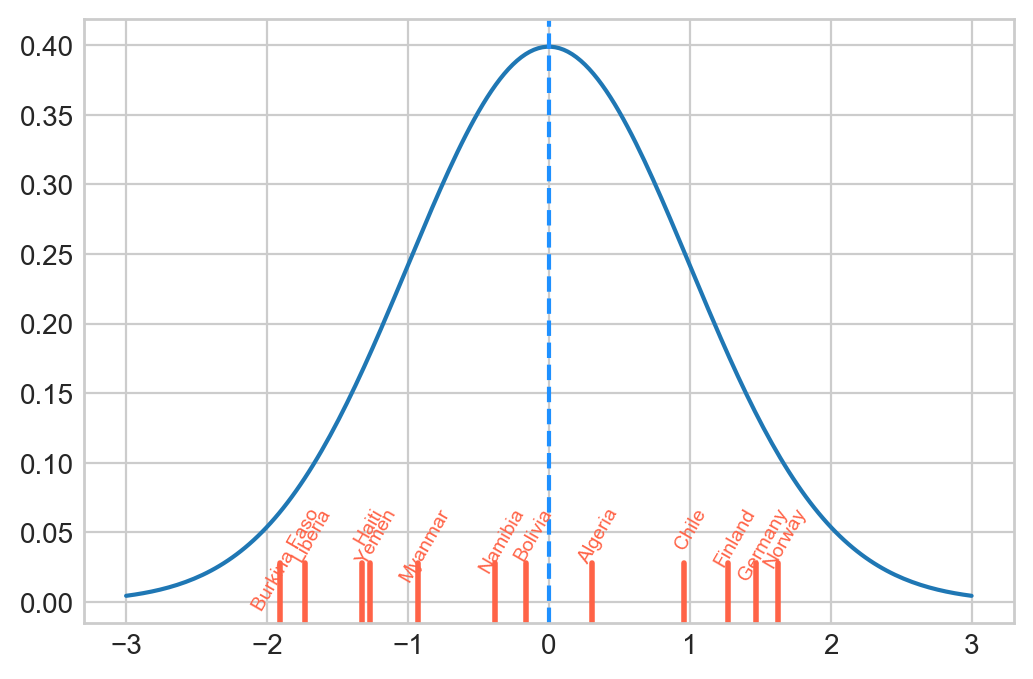

In [67]:
# generamos un array lineal
x_axis = np.linspace(-3, 3, 200)
# simulamos la función de densidad
plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1))
# marcamos la media en 0
plt.axvline(0, color='dodgerblue', linestyle='--')

# Pasamos un array de casos a visualizar en un loop.
# donde para cada elemento de éste array
for i in ['Chile', 'Burkina Faso', 'Haiti', 'Myanmar', 
          'Germany', 'Norway', 'Finland', 'Yemen', 'Bolivia',
         'Algeria', 'Namibia', 'Liberia']:
    # aplicaremos la función point_zscore
    point_zscore('undp_hdi', i)

* Posterior a graficar nuestra distribución normal estandarizada, pasaremos una lista donde posicionaremos una serie de países en cuanto a sus desviaciones estándares. Intentamos agregar una cantidad variada de países, para ver los correlatos desarrollados en nuestro análisis.
* En el rango inferior de nuestra distribución encontramos países de la zona subsahariana del África como Burkina Faso, Liberia y Namibia, países caracterizados por guerrillas caudillistas y fragilidad institucional.
* En el extremo opuesto encontramos a países asociados al Estado de Bienestar escandinavo como Noruega, Finlandia y países como Alemania.

# Variables Discretas: ¿Qué pasa cuando nuestras variables miden atributos?

* Hasta ahora sabemos trabajar cuando las variables representan mediciones contínuas. Resulta que muchas veces nuestros objetivos a analizar presentan _categorías_ y sus números son representaciones conceptuales.
* Para ello nos valemos de las variables aleatorias discretas, que permiten resumir el comportamiento de un fenómeno mediante el conteo (a diferencia de las variables aleatorias contínuas que permiten resumir el comportamiento de un fenómeno mediante la medición). La distribución de una variable aleatoria $X$ generalmente se especifica mediante un listado de todos los posibles valores y una función de probabilidad de masa $p(x)$

$$
p(x) = p_{X}(x) = \text{Pr}[X = x]
$$

## Ensayo de Bernoulli

* Tomemos la siguiente situación: Como investigadores nos preguntan por la estabilidad democrática a nivel mundial. Para ésto emplearemos la variable `gol_inst`, que mide el tipo de régimen en cada una de las observaciones.
* Nuestro objetivo es desarrollar una variable binaria, donde asginaremos la etiqueta 'Democracia' para todos aquellos casos que presenten alguna variante de democracia (régimen parlamentario, presidencial o semi-presidencial), y 'No Democracia' para todos los casos que no sean democracias.
* `numpy` ofrece el operador ternario `np.where()`, el cual nos facilita la reconversión de valores en base a la satisfacción de un criterio.
* La sintáxis de `np.where()` consta de tres partes:
    ```python
    np.where(<condición>, <valor_positivo>, <valor_negativo>)
    ```
    - `<condición>` hace referencia a un criterio formalizado en alguna expresión booleana que evalúe en verdaderos o falsos.
    - `<valor_positivo>` es el valor que tomarán aquellos elementos que satisfagan la condición.
    - `<valor_negativo>` es el valor que tomarán aquellos elementos que no satisfagan la condición.
    
* Sabemos que en la variable las democracias tienen un número asignado entre el 0 y el 2, y que las dictaduras tienen números entre el 3 y el 5.
* Para utilizar `np.where`, desarrollamos la condición booleana `df['gol_inst'] <= 2` para evaluar como 'Democracia' todos aquellos casos menores o iguales a 2 y 'No democracia' los demás.


In [68]:
# Proporciones de cada tipo de gobierno en el dataset
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')
# pidamos los porcentajes de democracias
democount = df['democracies'].value_counts('%').round(2)
democount

Democracia       0.65
No Democracia    0.35
Name: democracies, dtype: float64

In [69]:
# Conteo de tipos de gobierno en el dataset
df['democracies'].value_counts()

Democracia       127
No Democracia     67
Name: democracies, dtype: int64

* Acorde a nuestro criterio de recodificación, 127 observaciones se clasificaron como regímenes con tendencias democráticas y 67 como regímenes con tendencias autoritarias. El objeto `democount` que creamos nos puede servir para generar un gráfico de barras 

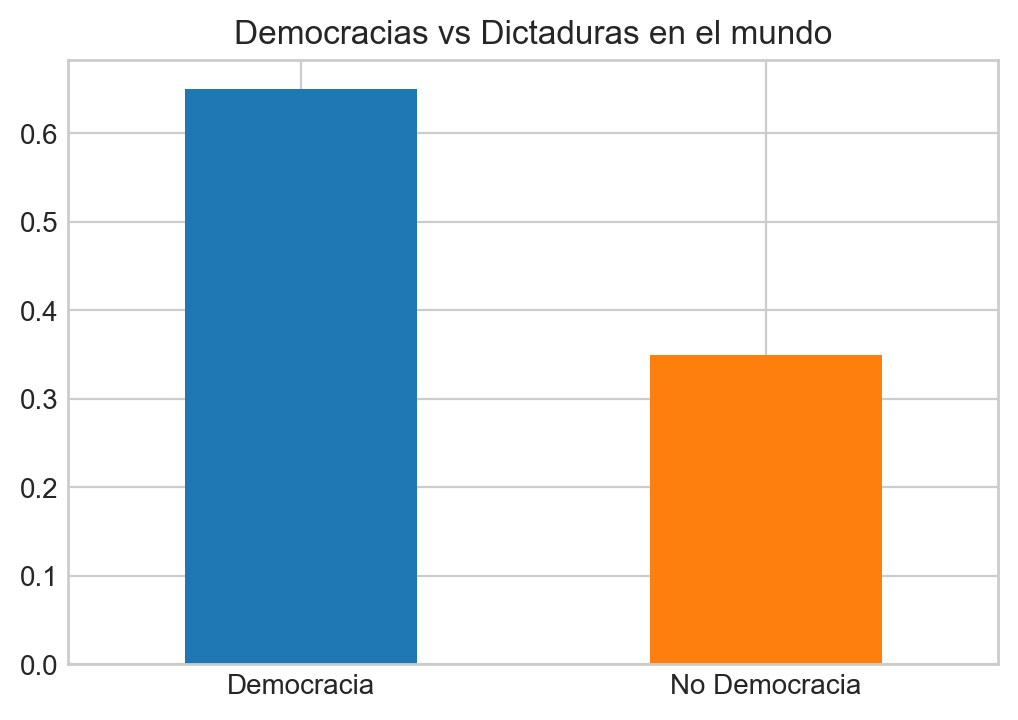

In [70]:
democount.plot(kind = 'bar')
plt.title("Democracias vs Dictaduras en el mundo")
plt.xticks(rotation = 'horizontal');

* Observamos que el 65.4% de las observaciones son clasificadas como democracias. Si tomamos un país al azar de los registrados en el dataset, hay un 65% de probabilidad de que el país sea una variante de régimen democrático.
* Para sustentar este enunciado, es necesario respaldarnos en las leyes estadísticas. ¿Cómo podemos hacerlo?

- Acorde a ésta variable, un país sólo puede ser _democracia_ o _dictadura_. 
- Sabemos que la probabilidad de suceso de un evento es $P$.
- Por tanto, su tasa de ausencia está definida como $Q=(1-P)$.

* La distribución Bernoulli (también llamada ensayo de Bernoulli) representa un caso individual donde se realiza un ensayo con $x\in[0, 1]$. Está gobernada por un parámetro contínuo $\mu \in [0, 1]$ que representa la probabilidad de $x = 1$.
    
* Podemos solicitar los primeros momentos de un ensayo de Bernoulli en el módulo `scipy.stats` mediante la función `bernoulli.stats`, donde ingresando nuestra probabilidad obtenemos nuestra media y varianza.

In [71]:
mu, sigma = stats.bernoulli.stats(.65)
print("La media del ensayo de Bernoulli es de: ", mu.round(2))
print("La varianza del ensayo de Bernoulli es de: ", sigma.round(2))
print("La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre :",
      round(mu - sigma, 2), round(mu + sigma, 2))

La media del ensayo de Bernoulli es de:  0.65
La varianza del ensayo de Bernoulli es de:  0.23
La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre : 0.42 0.88


## Distribución Binomial: Analizando una serie de ensayos de Bernoulli

* La información generada por el ensayo de Bernoulli es útil cuando buscamos caracterizar un caso cualquiera en nuestra muestra. Resulta que es de más interés ver cómo se distribuiría la tasa de éxito o fracaso en una muestra finita. Para ello utilizamos la distribución binomial.
* Supongamos que en base a la información que tenemos respecto a la probabilidad de ser democracia o autoritarismo de un país, deseamos saber cuál va a ser el comportamiento de la

* La distribución binomial da la probabilidad de observar $m$ ocurrencias de $x = 1$ en un conjunto de $N$ muestras que surge de una distribución Bernoulli, donde la probabilidad de ocurrencia de $x = 1$ es $\mu \in [0, 1]$.
* Solicitemos los primeros momentos de la distribución binomial para la muestra de 194 países, con la probabilidad de .654 de ser democráticos. Mediante la función `binom` podemos generar un objeto que tendrá el método `stats` que devuelve la cantidad de países que deberían ser democracias (mu) y la varianza (sigma)

In [72]:
prob_dem = stats.binom(len(df), .654)
mu, sigma = prob_dem.stats()
print("Con", len(df), "países y una probabilidad de .654, esperamos que", mu, " países tengan regímenes democráticos." )

Con 194 países y una probabilidad de .654, esperamos que 126.876  países tengan regímenes democráticos.


* La distribución Binomial depende de dos parámetros, el tamaño muestral y la proporción estimada. Para entender mejor cómo la proporción estimada afecta a la distribución, consideremos el siguiente ejemplo.
* Vamos a graficar las distribuciones empíricas de cuatro niveles de probabilidad (.3, .6, .9, .95), manteniendo constante el tamaño muestral.
* Observamos que en la medida que la proporción de casos va aumentando, nuestra curva de densidad se desplaza a lo largo del eje x, indicando mayores tasas de casos presentes en la muestra. Otro elemento a destacar en la medida que aumentamos la probabilidad, la curva tiende a disminuir su varianza. 

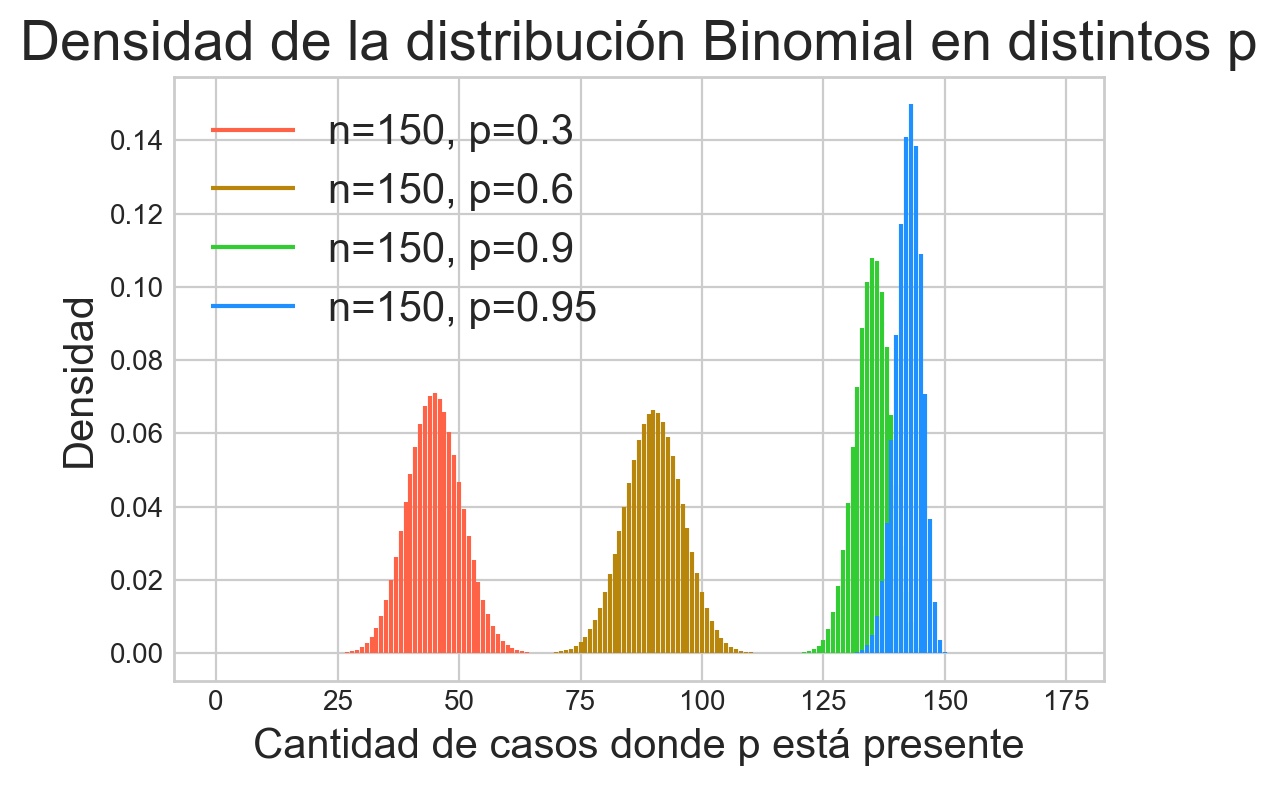

In [73]:
# generamos una lista con cuatro colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]

# iniciamos un loop para índices y valores
for i, prob in enumerate([.3, .6,.9, .95]):
    # generamos un arreglo con numpy de 175
    x_axis= np.arange(175)
    # para cada valor de nuestro array graficamos la probabilidad
    plt.vlines(x_axis, 0, stats.binom(150, prob).pmf(x_axis),
               # y asignamos un color en específico
               colors=colors[i], label="n=150, p={}".format(prob))
plt.legend(loc=2, fontsize = 15)
plt.title("Densidad de la distribución Binomial en distintos p", size = 20)
plt.xlabel('Cantidad de casos donde p está presente', size = 15)
plt.ylabel('Densidad', size = 15);

> __Digresión:__ Sobre `enumerate`
> 
> * Hay casos donde estamos interesados en pasar por todos los elementos de un arreglo, pero deseamos pasar tanto su posición y elemento como parámetros.
> * `enumerate` permite contar la posición e identificar cada elemento de una lista en específico. Así podemos pasar dos argumentos cuando ejecutamos el loop, separados por coma.
> * En el código del gráfico establecemos que vamos a recorrer todos los valores `i` (que corresponden a la posición del elemento en la lista) y `prob` (que corresponde al valor del elemento en la lista).
> * `i` se pasa como un localizador de cada elemento en `colors[i]`, mientras que `prob` se pasa como argumento en `stats.binom(150, prob)`.


* ¿Qué pasa cuando mantenemos nuestra probabilidad fija condicional al tamaño muestral?
* Grafiquemos el caso donde mantenemos nuestra probabilidad en .65, y vamos aumentando nuestra muestra de 50 hasta 200. Mientras que en valores muestrales pequeños la curva de densidad se muestra con una menor varianza, la curva se aproxima a la campana gaussiana en la medida que aumentamos su tamaño.

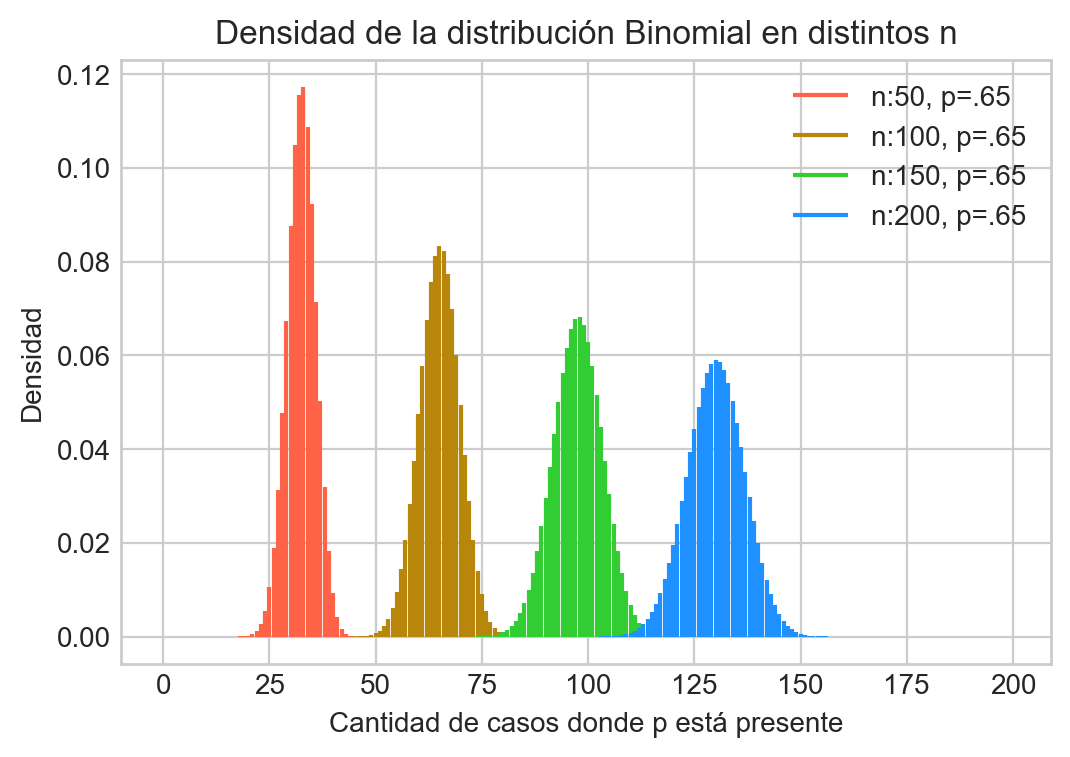

In [74]:
# generamos una lista de colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]

# iniciamos un loop para índices y valores
for i, n_size in enumerate([50, 100, 150, 200]):
    # generamos un arreglo con numpy de 200
    x_axis= np.arange(200)
    # para cada valor de nuestro array graficamos la probabilidad condicional al tamaño
    plt.vlines(x_axis, 0, stats.binom(n_size, .65).pmf(x_axis), colors=colors[i], label=r'n:{0}, p=.65'.format(n_size))
plt.legend()
plt.title("Densidad de la distribución Binomial en distintos n")
plt.xlabel("Cantidad de casos donde p está presente")
plt.ylabel('Densidad');

## Gráficos de torta: ¿Por qué evitarlos?

* Para las variables que miden atributos discretos, se prefieren los gráficos de barra por sobre los gráficos de torta.
* Los gráficos de barra permiten generar comparaciones entre grupos de forma mucho más clara, al contrastar cantidades en el eje Y. A diferencia de los gráficos de torta, donde las cantidades son proporcionales a un área de la torta que se distribuye.
* Ocupan mucho espacio y visualizan mucho ruido en la forma de presentar resultados. En la medida que se incluyen más categorías a contrastar en los gráficos de torta, es más dificil diferenciar entre ángulos de la torta.  
>  Una tabla casi siempre es mejor que un tonto gráfico de torta; la única cosa peor que un gráfico de torta son varios gráficos de torta, que para el público presente le resulta imposible comparar cantidades posicionadas en espacios anómalos. Dado su baja densidad dimensional y fracaso en ordenar números a lo largo de una dimensión visual, los gráficos de torta no deben ser utilizados.
> 
> _Edward Tufte_

* Para clarificar éste punto, comparemos la cantidad de observaciones dentro de cada región:
* Con `plt.subplot(1, 2, 1)` instruímos a python a considerar un espacio con una fila y dos columnas poner cada gráfico. El último número asigna el espacio específico dentro del layout detallado.

In [75]:
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'Dictadura')
# pidamos los porcentajes de democracias
democount = df['democracies'].value_counts('%').round(2)
democount

Democracia    0.65
Dictadura     0.35
Name: democracies, dtype: float64

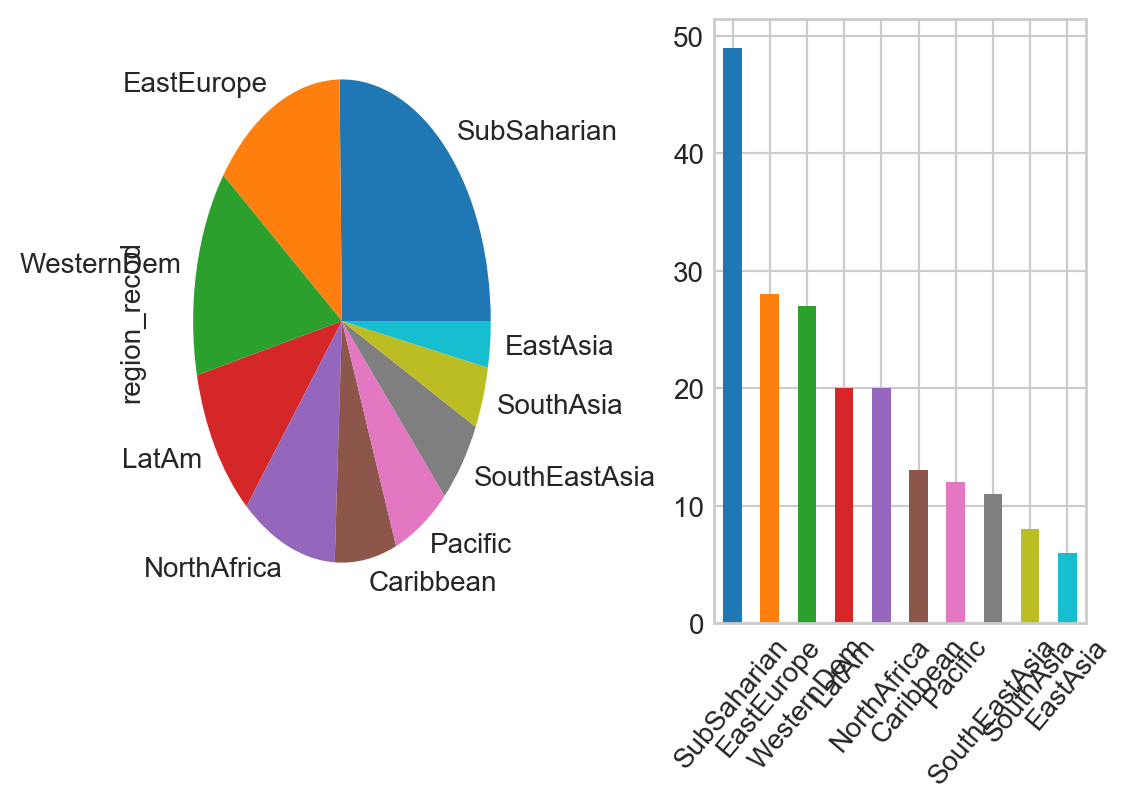

In [76]:
plt.subplot(1,2,1)
hdi_group.region_recod.value_counts().plot(kind='pie')
plt.subplot(1,2,2)
hdi_group.region_recod.value_counts().plot(kind='bar')
plt.subplots_adjust(wspace=0.5)
plt.xticks(rotation = 50);

* Mientras que el gráfico de torta clarifica cuál es la región con más observaciones, presenta dificultades en desagregar los siguientes grupos. 
* A diferencia, un gráfico de barras permite discriminar de forma efectiva el peso de cada grupo. Cuando optemos por gráficar la frecuencia de cada atributo discreto, siempre hay que preferir gráficos de barra.

# Aspectos asintóticos de las distribuciones

* Posteriormente trabajaremos con inferencias para sustentar nuestro trabajo cuando tenemos información limitada al respecto. Para facilitar el proceso inferencial en nuestro trabajo, nos valemos de leyes que generalizen el comportamiento de nuestros datos.

* Las variables aleatorias nos permiten vincular nuestros datos a leyes empíricas que permiten formalizar el procedimiento analítico en nuestro flujo de trabajo.

* Tenemos dos leyes que nos facilitarán la manera en que trabajamos y realizamos la inferencia:
    - Ley de los Grandes Números
    - Teorema del Límite Central

* El comportamiento del último gráfico sugiere que las distribuciones se ven alteradas por el tamaño muestral. Dentro de la estadística ésto se conoce como un comportamiento asintótico de la distribución. Estos hacen referencia al comportamiento de las distribuciones probabilísticas en la medida que el tamaño muestral aumenta de forma indefinida.

* La siguiente figura grafica las múltiples distribuciones y sus asociaciones. Un punto relevante a destacar es la relevancia de la distribución normal. Muchas de las distribuciones (como las Binomiales y Lognormales vistas anteriormente), se pueden reexpresar mediante la distribución normal, asumiendo que recolectamos suficientes datos.

![Kokoska](kokoska-nevison.png)

## Ley de los Grandes Números

* Cuando realizamos una secuencia de ensayos independientes bajo condiciones similares, la frecuencia de un resultado específico tenderá a ser estable.
* La ley de los grandes números establece que en una sucesión infinita de variables aleatorias _i.i.d_ (independientes e idénticamente distribuídas) con expectativa $\mu$ y varianza $\sigma^{2}$, el promedio de la sucesión:
$$
\bar{X}_{n} = (X_{1} + X_{2} + \ldots + X_{n}) /n
$$
convergerá en probabilidad a $\mu$.

* La ley de los grandes números afecta a la convergencia de la muestra respecto a la media poblacional. Cuando las estimaciones tienen a acercarse a la verdad, los errores estándares tienen a disminuír.
* Ésto se ilustra de mejor manera en el gráfico `gfx.law_large_numbers()`. En éste generamos una simulación de seis ensayos independientes siguiendo una distribución Poisson. En el ejemplo sabemos de antemano que el valor verdadero de la cual surgen los ensayos es de 10, señalado con la línea gruesa $\Theta$.
* Tomemos como punto de partida cuando el tamaño muestral es pequeño. Existen ensayos que sobreestiman el valor verdadero, y otras donde el valor es subestimado.
* En la medida que aumentamos el tamaño muestral de cada ensayo, la media muestra estimada tiende a acercarse a $\Theta$.


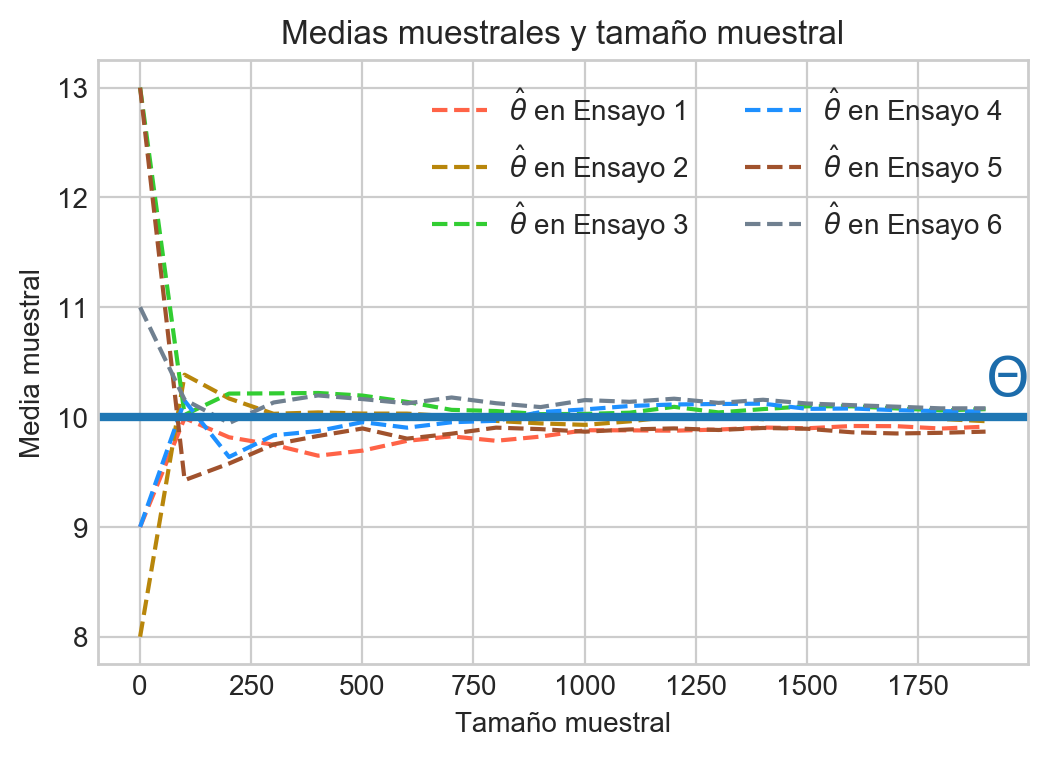

In [77]:
gfx.law_large_numbers()
plt.legend(loc='best',ncol=2)


> __Digresión:__ Teorema Glivenko-Cantelli
>
> Una explicación alternativa a la convergencia en la medida que el tamaño muestral aumenta, se obtiene al medir la función empírica distributiva acumulada:
>
>$$
\tilde{F}_{n}(a) \equiv \frac{1}{n}\sum_{i=1}^{n}1_{(-\infty, a]}(x_{i})
$$
>
> donde buscamos caracterizar la distribución empírica de $x$ mediante $\leq a$, que es la fración de muestras.
>
> El teorema Glivenko-Cantelli establece que:
>
>$$
\max_{a}|\tilde{F}_{n}(a) - F(a)|\rightarrow 0
$$
>
> La función empírica distributiva acumulada converge a la función distributiva acumulada verdadera en $x$, el espacio máximo entre las dos tiende a cero en la medida que el número de muestras incrementa.
> Este punto da pie a que podemos saber sobre las distribuciones subyacentes mediante la recolección de suficientes datos.

### Teorema del Límite Central

Si tenemos una secuencia de variables aleatorias independientes con media $\mu$ y varianza finita $\sigma^{2}$,

$$
\frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{N}}}\xrightarrow{d}\mathcal{N}(0,1)
$$

donde $\xrightarrow{d}$ significa __Convergencia en distribución__.

* El Teorema del Límite Central es una piedra angular para la inferencia estadística. Nos permite relajar los supuestos sobre la distribución de nuestras variables.
* Independiente de la distribución de la variable, la suma y media de las mediciones de cada variable tiende a tener una distribución aproximadamente normal. Ésta aproximacieon se ajusta a una campana gaussiana en la medida que más mediciones del evento son agregadas a la suma o media total.
* Dado una variable aleatoria cualquiera, si iteramos $N$ veces en muestras de $n$ tamaño y calculamos sus promedio, se cumplirán los siguientes puntos:
    1. La suma de dichos promedios tendrá una aproximación $\leadsto \mathcal{N}(0,1)$.
    2. La desviación estandar de los promedios disminuirá por $\sqrt{n}$.
    3. $\hat{\theta}$ y $\boldsymbol\theta$ convergerán en la medida que $N \rightarrow \infty$.
* En el gráfico generado con `gfx.central_limit_theorem()` se ilustra el efecto en la estimación en la medida que se aumenta la muestra. Cada barra celeste es la media de una muestra. La línea vertical señala el parámetro verdadero a contener, en este caso 200. La curva roja señala la distribución empírica de la muestra.
* Si bien en las primeras iteraciones la muestra falla en capturar la distribución subyacente, cuando reunimos suficientes datos la suma de las medias de cada muestra tiende a la normalidad.

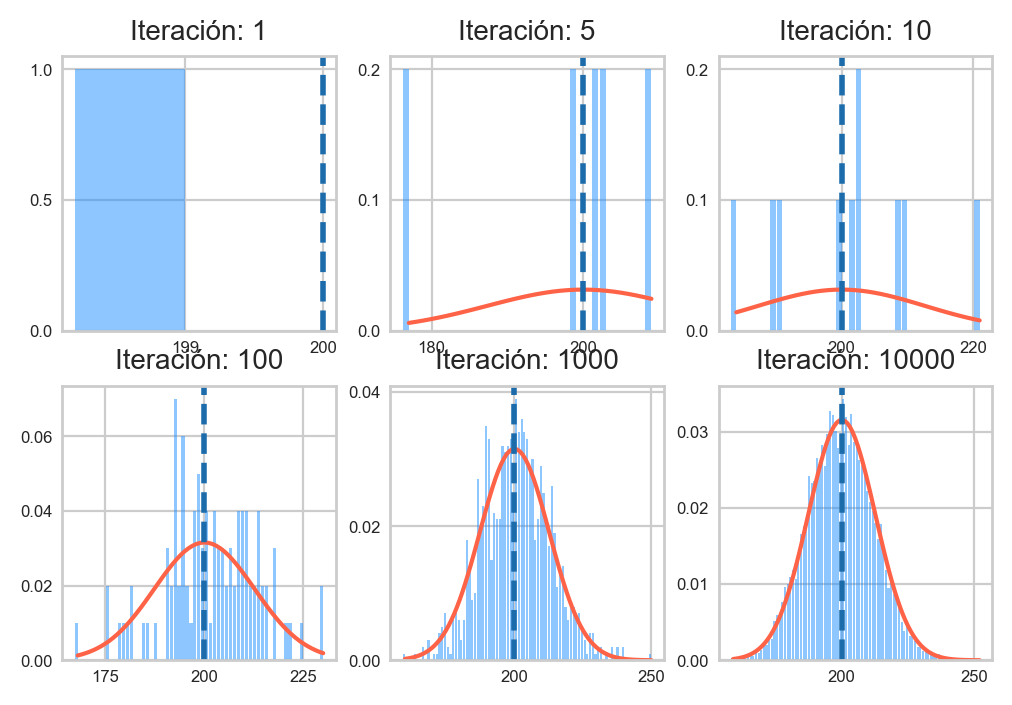

In [78]:
gfx.central_limit_theorem()

* En las próximas sesiones veremos la ubicuidad de éstas leyes asintóticas, que permiten relajar los supuestos en los cuales nuestras pruebas estadísticas descansan.

# Referencias


* Para profundizar sobre las variables aleatorias y sus atributos, pueden referirse a:
    * Caffo, B. 2015. Statistical Inference for Data Science:
        - Ch. 6: Some common distributions.
        - Ch. 7: Asymptopia
    * Dodge, Y. 2006. The Concise Encyclopedia of Statistic:
        - Random Variable (página 446)
* Si desean tener una exposición rigurosa a los aspectos formales y asintóticos de las variables aleatorias, pueden referirse a:
    * Casella, G; Berger, R. 2002. Statistical Inference:
        - Ch 3: Common families of distributions


